# Project : SENTIMENT ANALYSIS ON MOVIE REVIEWS

# Description: Perform sentiment analysis on movie reviews to determine if the sentiment is positive or negative.

# Importing Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load Dataset

In [4]:
df = pd.read_csv("D:/IMDB Dataset.csv")

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Count Plot of Sentiments

<Axes: xlabel='sentiment', ylabel='count'>

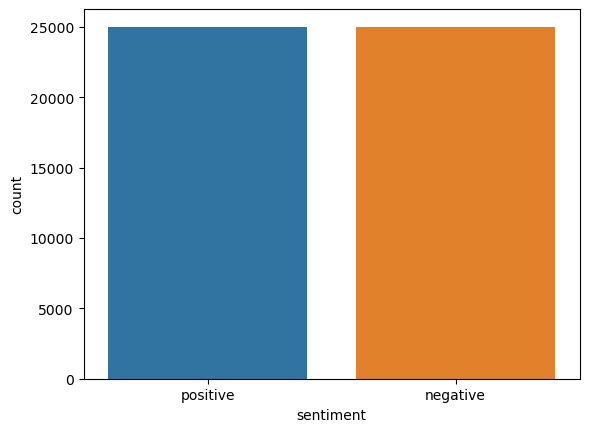

In [6]:
sns.countplot(data=df, x='sentiment')

# Getting Data without Null

In [7]:
df = df.where(pd.notnull(df),'')

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Allocating Specific Values

In [8]:
df.loc[df['sentiment']=='positive', 'sentiment',]=1

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
df.loc[df['sentiment']=='negative', 'sentiment',]=0

In [11]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Checking Datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# Feature Extraction X & Y

In [13]:
X = df['review']
y= df['sentiment']

In [14]:
X

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [15]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: object

# Data Split into Train & Test 

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=9)

In [17]:
X_train.shape

(40000,)

In [18]:
X_test.shape

(10000,)

In [19]:
y_test.shape

(10000,)

In [20]:
y_train.shape

(40000,)

# Convert Textual Data into Numerical Vectors

In [21]:
feature_extraction = TfidfVectorizer(min_df= 1 ,stop_words='english', lowercase=True)

In [22]:
X_train_feature = feature_extraction.fit_transform(X_train)

In [23]:
X_test_feature= feature_extraction.transform(X_test)

In [24]:
print(X_train_feature)

  (0, 46265)	0.08394819837518389
  (0, 17979)	0.10471702930388876
  (0, 54679)	0.08826640700521104
  (0, 3662)	0.11833829588051722
  (0, 60888)	0.04744125023045033
  (0, 34502)	0.05921743888268194
  (0, 17060)	0.10620847298427485
  (0, 69378)	0.18982204640932676
  (0, 66614)	0.043338391935325904
  (0, 79860)	0.08870132374620435
  (0, 71353)	0.0542556786697082
  (0, 91065)	0.06760609630123211
  (0, 78406)	0.043550384316472804
  (0, 39097)	0.0825605132425876
  (0, 13650)	0.0605690639367542
  (0, 3000)	0.16284629345716703
  (0, 22393)	0.1685149017236491
  (0, 42992)	0.1751448918571928
  (0, 70724)	0.14686738421194648
  (0, 44951)	0.1333663294810515
  (0, 5627)	0.5386254180687904
  (0, 34856)	0.12286429889090536
  (0, 45039)	0.12521986670024388
  (0, 55159)	0.06612305071895526
  (0, 58007)	0.09113276582540238
  :	:
  (39999, 27951)	0.11128661126556173
  (39999, 86972)	0.10848637578821065
  (39999, 31355)	0.0918371326266443
  (39999, 64828)	0.11229802447920516
  (39999, 38120)	0.11449170307

# Change Datatypes of : "Y"

In [25]:
y_train=y_train.astype('int')
y_test = y_test.astype('int')

# Model Selections

# Creating Objects of Every Models

In [26]:
mb = MultinomialNB()
lr = LogisticRegression()
kc = KNeighborsClassifier(n_neighbors=7)
rc = RandomForestClassifier()
xg = XGBClassifier()
dt = DecisionTreeClassifier()

In [28]:
models = [dt,mb,lr,kc,rc,xg]

# Models Evaluation

In [29]:
for model in models:
    print(f'The Model is :{model}')
    model.fit(X_train_feature, y_train)
    print(f'The Accuracy score of {model} --> {accuracy_score(y_test, model.predict(X_test_feature))}')

The Model is :DecisionTreeClassifier()
The Accuracy score of DecisionTreeClassifier() --> 0.7277
The Model is :MultinomialNB()
The Accuracy score of MultinomialNB() --> 0.862
The Model is :LogisticRegression()
The Accuracy score of LogisticRegression() --> 0.89
The Model is :KNeighborsClassifier(n_neighbors=7)
The Accuracy score of KNeighborsClassifier(n_neighbors=7) --> 0.7697
The Model is :RandomForestClassifier()
The Accuracy score of RandomForestClassifier() --> 0.8529
The Model is :XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_

# New Input Review to Predict Positive & Negative

# Positive Review

In [30]:
positive = ["The movie was absolutely fantastic! The storyline was gripping, the acting was top-notch, and the special effects were stunning. I highly recommend it to anyone who enjoys a great cinematic experience."]
negative = ["I was very disappointed with the movie. The plot was predictable, the acting was mediocre, and the special effects were lackluster. I wouldn't recommend it to anyone."]

In [31]:
input_data_feature1 = feature_extraction.transform(positive)

In [32]:
for model in models:
    print(f'Model is {model} ---> Prediction {model.predict(input_data_feature1)}')

Model is DecisionTreeClassifier() ---> Prediction [1]
Model is MultinomialNB() ---> Prediction [1]
Model is LogisticRegression() ---> Prediction [1]
Model is KNeighborsClassifier(n_neighbors=7) ---> Prediction [1]
Model is RandomForestClassifier() ---> Prediction [1]
Model is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_

# Negative Review

In [33]:
input_data_feature2 = feature_extraction.transform(negative)

In [34]:
for model in models:
    print(f'Model is {model} ---> Prediction {model.predict(input_data_feature2)}')

Model is DecisionTreeClassifier() ---> Prediction [0]
Model is MultinomialNB() ---> Prediction [0]
Model is LogisticRegression() ---> Prediction [0]
Model is KNeighborsClassifier(n_neighbors=7) ---> Prediction [0]
Model is RandomForestClassifier() ---> Prediction [0]
Model is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_